# 📓 Análise do Dataset – GDP per Country 2020–2025

__Nome do dataset:__  GDP per Country 2020–2025

__Fonte:__ IMF (via Kaggle)

__Descrição:__ Valores anuais do Produto Interno Bruto (PIB) de todos os países reconhecidos, no período 2020–2025.

__Objetivo da análise:__ Explorar tendências globais e regionais, identificar países com maior crescimento ou queda e analisar a distribuição do PIB mundial nesse período.

__Moeda:__ USD

In [1]:
import pandas as pd

In [ ]:
# Load the GDP data from a CSV file
df_gdp = pd.read_csv('2020-2025.csv')
df_gdp.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [ ]:
# Get the column names
df_gdp.columns.tolist()

['Country', '2020', '2021', '2022', '2023', '2024', '2025']

In [5]:
# Get a summary of the DataFrame
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


In [8]:
# Check for missing values in each column
df_gdp.isnull().sum().sort_values(ascending=False)

2025       7
2024       4
2021       2
2023       2
2022       2
2020       0
Country    0
dtype: int64

In [9]:
# Check for duplicate values in the 'Country' column
df_gdp['Country'].duplicated().sum()

np.int64(0)

In [13]:
# Get a random sample of 10 countries
df_gdp['Country'].sample(10)

81                   Ireland
94                      Laos
145                    Samoa
135                 Paraguay
110               Mauritania
162    Saint Kitts and Nevis
132                    Palau
98                   Liberia
128          North Macedonia
180             Turkmenistan
Name: Country, dtype: object

In [ ]:
# Get a sorted list of unique countries
sorted(df_gdp['Country'].unique())

“O dataset apresenta valores ausentes em poucos países, principalmente em 2025 (7 casos). Decidiu-se manter os países e apenas ignorar os anos faltantes nas análises específicas.”

In [14]:
# Convert df from wide to long
df_long = df_gdp.melt(
    id_vars=["Country"],        # column that will be kept
    value_vars=["2020", "2021", "2022", "2023", "2024", "2025"],  # columns that will be melted
    var_name="Year",            # new column for the years
    value_name="GDP"            # new column for gdp
)

In [15]:
# Convert data types
df_long["Year"] = df_long["Year"].astype(int)     # transform year to int
df_long["GDP"] = df_long["GDP"].astype(float)     # transform gdp to float

In [16]:
# Get a summary of the DataFrame
print(df_long.head(12))
print(df_long.info())

                Country  Year        GDP
0           Afghanistan  2020    20136.0
1               Albania  2020    15271.0
2               Algeria  2020   164774.0
3               Andorra  2020     2885.0
4                Angola  2020    66521.0
5   Antigua and Barbuda  2020     1412.0
6             Argentina  2020   385218.0
7               Armenia  2020    12642.0
8                 Aruba  2020     2486.0
9             Australia  2020  1362613.0
10              Austria  2020   434050.0
11           Azerbaijan  2020    42693.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1176 non-null   object 
 1   Year     1176 non-null   int64  
 2   GDP      1159 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.7+ KB
None


In [17]:
# Get basic statistics of the GDP values
df_long.describe()

,Year,GDP
count,1176.000000,1.159000e+03
mean,2022.500000,5.313372e+05
std,1.708552,2.377393e+06
min,2020.000000,5.200000e+01
25%,2021.000000,1.207000e+04
50%,2022.500000,4.275200e+04
75%,2024.000000,2.700660e+05
max,2025.000000,3.050722e+07


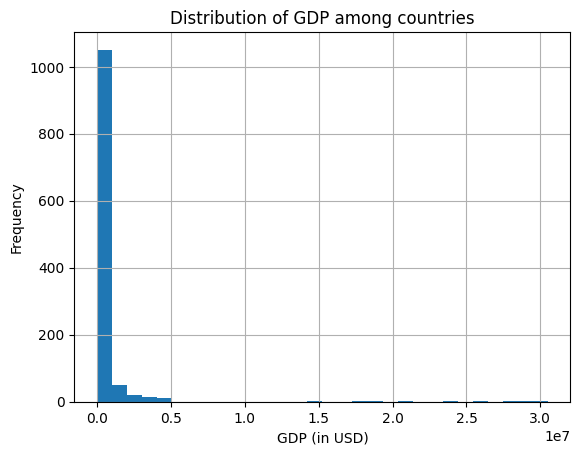

In [18]:
# Plot the distribution of GDP values

import matplotlib.pyplot as plt

df_long["GDP"].hist(bins=30)
plt.xlabel("GDP (in USD)")
plt.ylabel("Frequency")
plt.title("Distribution of GDP among countries")
plt.show()


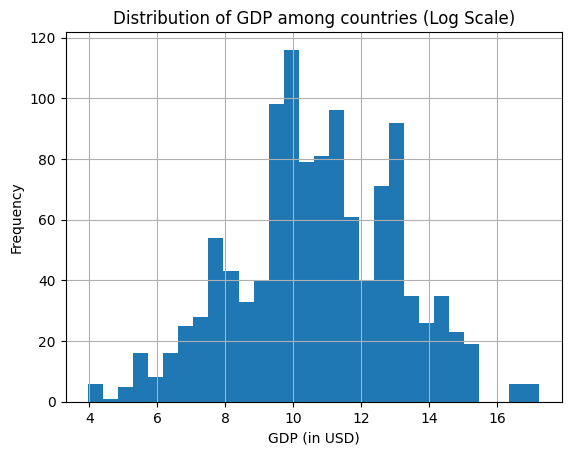

In [19]:

import numpy as np
df_long["GDP_log"] = np.log1p(df_long["GDP"])
df_long["GDP_log"].hist(bins=30)
plt.xlabel("GDP (in USD)")
plt.ylabel("Frequency")
plt.title("Distribution of GDP among countries (Log Scale)")
plt.show()

In [20]:
# Get the top 10 countries by GDP in 2025
top2025 = df_long[df_long["Year"] == 2025].sort_values("GDP", ascending=False).head(10)
top2025

,Country,Year,GDP,GDP_log
1166,United States,2025,30507217.0,17.233474
1016,China,2025,19231705.0,16.772071
1044,Germany,2025,4744804.0,15.372561
1057,India,2025,4187017.0,15.247499
1065,Japan,2025,4186431.0,15.247359
1165,United Kingdom,2025,3839180.0,15.160770
1040,France,2025,3211292.0,14.982184
1063,Italy,2025,2422855.0,14.700458
1012,Canada,2025,2225341.0,14.615421
1004,Brazil,2025,2125958.0,14.569734


In [21]:
# Get the bottom 10 countries by GDP in 2025
bottom2025 = df_long[df_long["Year"] == 2025].sort_values("GDP", ascending=True).head(10)
bottom2025

,Country,Year,GDP,GDP_log
1161,Tuvalu,2025,65.0,4.189655
1101,Nauru,2025,169.0,5.135798
1089,Marshall Islands,2025,297.0,5.697093
1069,Kiribati,2025,312.0,5.746203
1112,Palau,2025,333.0,5.811141
1093,Federated States of Micronesia,2025,500.0,6.216606
1156,Tonga,2025,568.0,6.343880
1028,Dominica,2025,742.0,6.610696
1127,São Tomé and Príncipe,2025,864.0,6.762730
1142,Saint Kitts and Nevis,2025,1129.0,7.029973


In [22]:
# Get the GDP data for Angola
angola_gdp = df_long[df_long["Country"] == "Angola"]
angola_gdp

,Country,Year,GDP,GDP_log
4,Angola,2020,66521.0,11.105288
200,Angola,2021,84375.0,11.343038
396,Angola,2022,142442.0,11.866697
592,Angola,2023,109764.0,11.606097
788,Angola,2024,115946.0,11.660888
984,Angola,2025,113343.0,11.638183


In [23]:
# Get the global GDP trend over the years
global_trend = df_long.groupby("Year")["GDP"].mean()
global_trend

Year
2020    437888.637755
2021    504350.438144
2022    525506.381443
2023    548617.283505
2024    575687.072917
2025    599141.449735
Name: GDP, dtype: float64

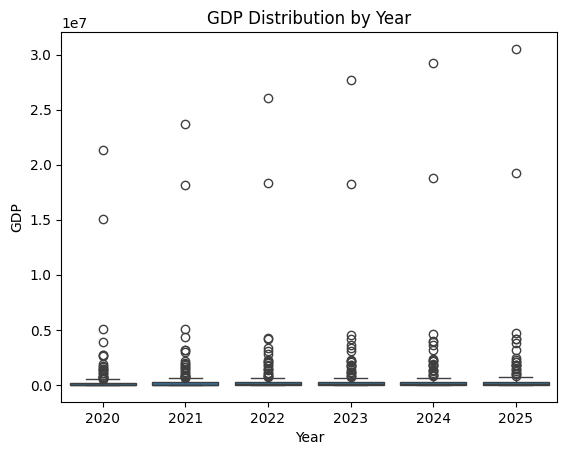

In [25]:

import seaborn as sns

sns.boxplot(x="Year", y="GDP", data=df_long)
plt.title("GDP Distribution by Year")
plt.show()

In [26]:
# 1) Sort the DataFrame by Country and Year
df_long = df_long.sort_values(by=["Country", "Year"])

# 2) Calculate year-over-year percentage change in GDP for each country
df_long["GDP_growth_pct"] = df_long.groupby("Country")["GDP"].pct_change() * 100
df_long

C:\Users\egnoe\AppData\Local\Temp\ipykernel_26216\1929278090.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_long["GDP_growth_pct"] = df_long.groupby("Country")["GDP"].pct_change() * 100


,Country,Year,GDP,GDP_log,GDP_growth_pct
0,Afghanistan,2020,20136.0,9.910314,NaN
196,Afghanistan,2021,14278.0,9.566545,-29.092173
392,Afghanistan,2022,14501.0,9.582042,1.561843
588,Afghanistan,2023,17248.0,9.755509,18.943521
784,Afghanistan,2024,NaN,NaN,0.000000
...,...,...,...,...,...
391,Zimbabwe,2021,36016.0,10.491746,33.998065
587,Zimbabwe,2022,32613.0,10.392497,-9.448578
783,Zimbabwe,2023,35144.0,10.467238,7.760709
979,Zimbabwe,2024,35224.0,10.469511,0.227635


In [ ]:
# Get the GDP data for Angola
angola_gdp = df_long[df_long["Country"] == "Angola"]
angola_gdp

,Country,Year,GDP,GDP_log,GDP_growth_pct
4,Angola,2020,66521.0,11.105288,NaN
200,Angola,2021,84375.0,11.343038,26.839645
396,Angola,2022,142442.0,11.866697,68.820148
592,Angola,2023,109764.0,11.606097,-22.941267
788,Angola,2024,115946.0,11.660888,5.632083
984,Angola,2025,113343.0,11.638183,-2.245011


In [28]:
# 1) Select the initial and final GDP values for each country
gdp_start = df_long[df_long["Year"] == 2020][["Country", "GDP"]].rename(columns={"GDP": "GDP_start"})
gdp_end   = df_long[df_long["Year"] == 2025][["Country", "GDP"]].rename(columns={"GDP": "GDP_end"})

# 2) Merge the initial and final GDP values into a single DataFrame
df_cagr = gdp_start.merge(gdp_end, on="Country", how="inner")

# 3) Calculate CAGR
df_cagr["CAGR_pct"] = ((df_cagr["GDP_end"] / df_cagr["GDP_start"]) ** (1/5) - 1) * 100

# 4) Check the result
print(df_cagr.head(10))

               Country  GDP_start    GDP_end   CAGR_pct
0          Afghanistan    20136.0        NaN        NaN
1              Albania    15271.0    28372.0  13.189071
2              Algeria   164774.0   268885.0  10.289858
3              Andorra     2885.0     4035.0   6.939844
4               Angola    66521.0   113343.0  11.246713
5  Antigua and Barbuda     1412.0     2373.0  10.941136
6            Argentina   385218.0   683533.0  12.152919
7              Armenia    12642.0    26258.0  15.741517
8                Aruba     2486.0     4100.0  10.523988
9            Australia  1362613.0  1771681.0   5.390775


In [ ]:
# Get the top 10 countries by CAGR
top10_cagr = df_cagr.sort_values("CAGR_pct", ascending=False).head(10)
top10_cagr

,Country,GDP_start,GDP_end,CAGR_pct
70,Guyana,5471.0,25822.0,36.390660
191,Venezuela,42838.0,108511.0,20.428400
92,Kyrgyzstan,8283.0,19849.0,19.099570
71,Haiti,14508.0,33548.0,18.252905
62,Georgia,16013.0,35353.0,17.163062
28,Burundi,3089.0,6745.0,16.904925
68,Guinea,14089.0,30094.0,16.391147
101,Macau,25344.0,53354.0,16.053533
7,Armenia,12642.0,26258.0,15.741517
105,Maldives,3706.0,7480.0,15.079837


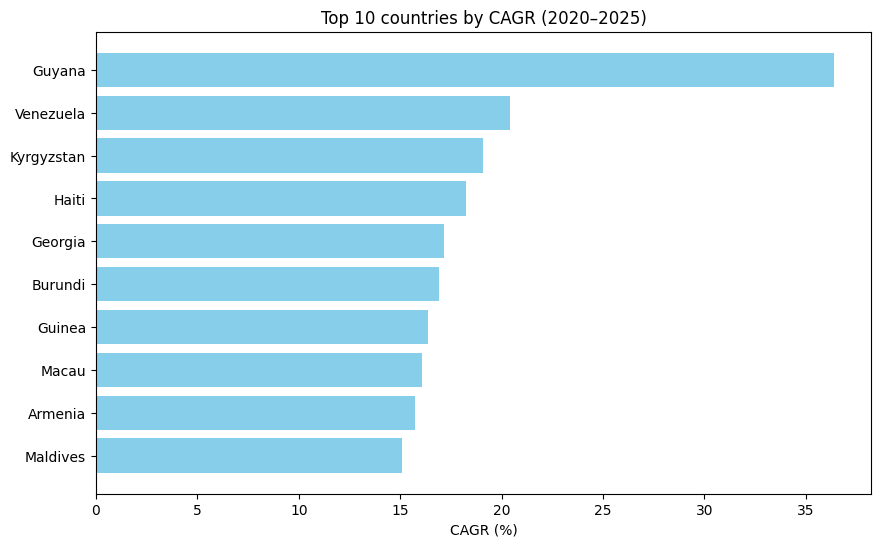

In [30]:
# Plot the top 10 countries by CAGR
plt.figure(figsize=(10,6))
plt.barh(top10_cagr["Country"], top10_cagr["CAGR_pct"], color="skyblue")
plt.xlabel("CAGR (%)")
plt.title("Top 10 countries by CAGR (2020–2025)")
plt.gca().invert_yaxis()  # keeps the country with the highest CAGR on top
plt.show()

In [ ]:
# Get the bottom 10 countries by CAGR
bottom10_cagr = df_cagr.sort_values("CAGR_pct", ascending=True).head(10)
bottom10_cagr

,Country,GDP_start,GDP_end,CAGR_pct
125,Nigeria,432299.0,188271.0,-15.316297
162,South Sudan,5423.0,3998.0,-5.914946
85,Japan,5054069.0,4186431.0,-3.696836
193,Yemen,20220.0,17401.0,-2.958252
93,Laos,18511.0,16322.0,-2.485612
165,Sudan,35237.0,31506.0,-2.213508
49,Egypt,382525.0,347342.0,-1.911183
175,Timor-Leste,2163.0,2115.0,-0.447821
117,Myanmar,65631.0,64944.0,-0.210234
98,Libya,46893.0,47484.0,0.250802


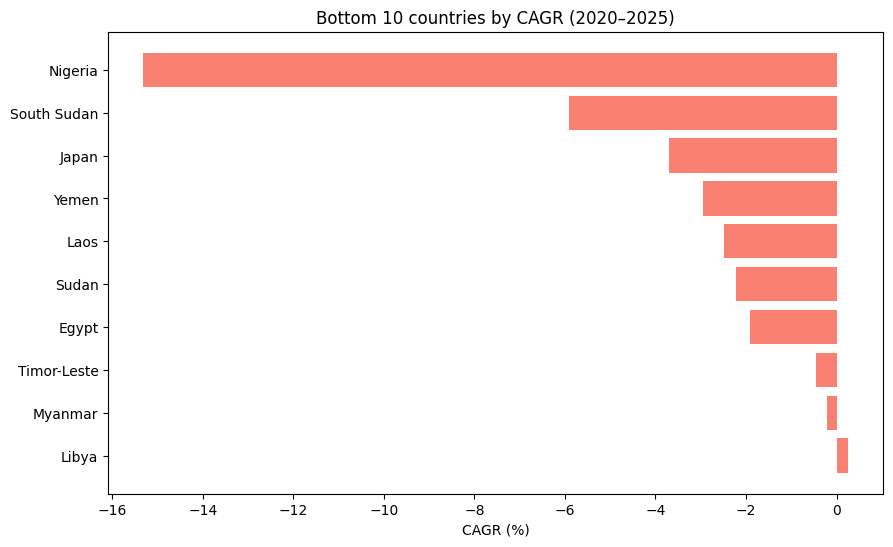

In [32]:
# Plot the bottom 10 countries by CAGR
plt.figure(figsize=(10,6))
plt.barh(bottom10_cagr["Country"], bottom10_cagr["CAGR_pct"], color="salmon")
plt.xlabel("CAGR (%)")
plt.title("Bottom 10 countries by CAGR (2020–2025)")
plt.gca().invert_yaxis()  # keeps the country with the lowest CAGR on top
plt.show()

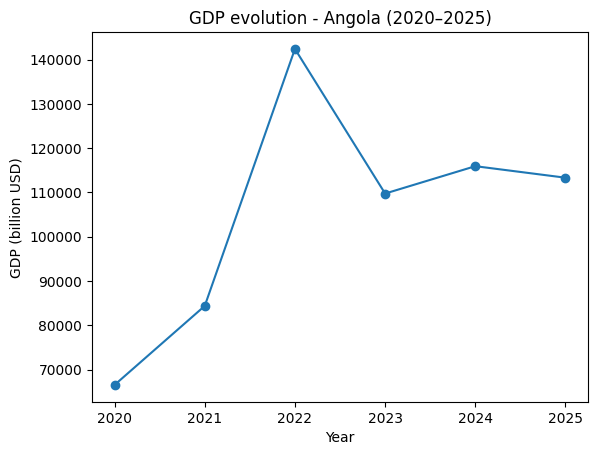

In [33]:
# Plot GDP evolution for a specific country
country = "Angola"
df_country = df_long[df_long["Country"] == country]

plt.plot(df_country["Year"], df_country["GDP"], marker="o")
plt.title(f"GDP evolution - {country} (2020–2025)")
plt.xlabel("Year")
plt.ylabel("GDP (billion USD)")
plt.show()

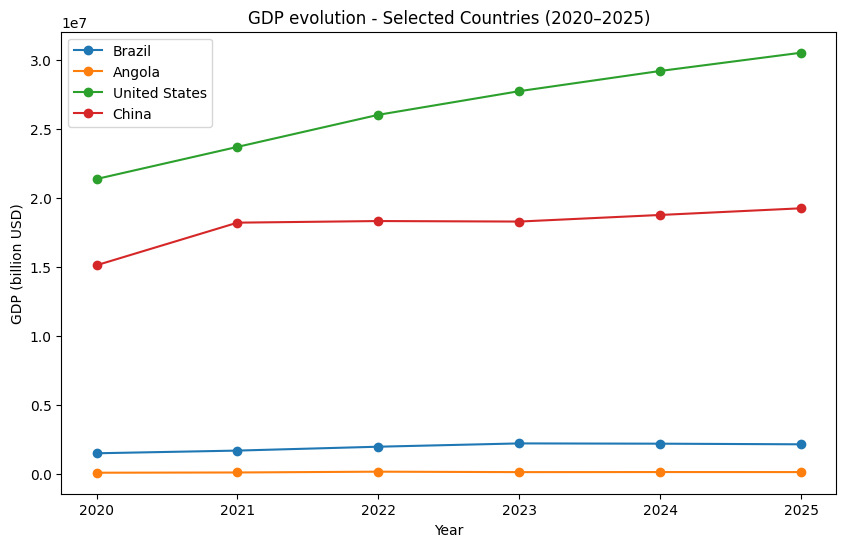

In [40]:
# Plot GDP evolution for multiple countries
plt.figure(figsize=(10,6))
countries = ["Brazil", "Angola", "United States", "China"]

df_compare = df_long[df_long["Country"].isin(countries)]

for c in countries:
    df_c = df_compare[df_compare["Country"] == c]
    plt.plot(df_c["Year"], df_c["GDP"], marker="o", label=c)

plt.title("GDP evolution - Selected Countries (2020–2025)")
plt.xlabel("Year")
plt.ylabel("GDP (billion USD)")
plt.legend()
plt.show()

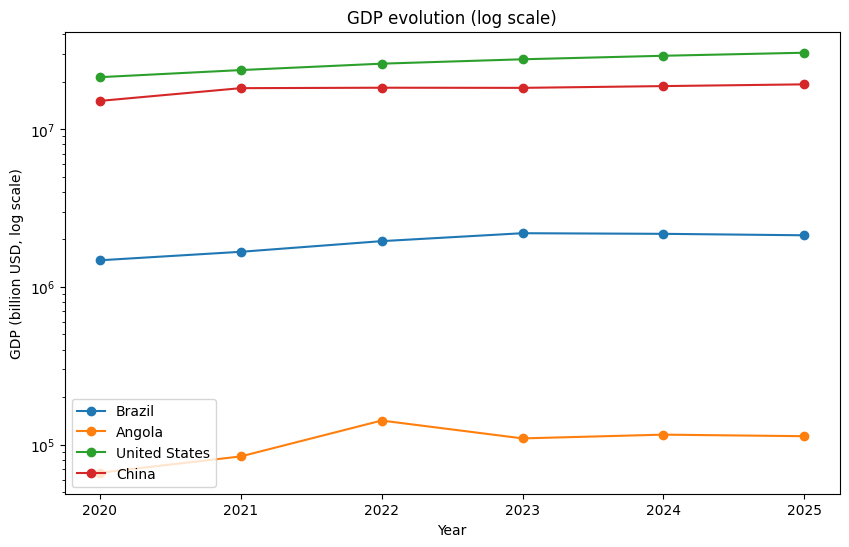

In [41]:
# Plot GDP evolution for multiple countries with log scale
plt.figure(figsize=(10,6))
countries = ["Brazil", "Angola", "United States", "China"]
df_compare = df_long[df_long["Country"].isin(countries)]

for c in countries:
    df_c = df_compare[df_compare["Country"] == c]
    plt.plot(df_c["Year"], df_c["GDP"], marker="o", label=c)

plt.yscale("log")
plt.title("GDP evolution (log scale)")
plt.xlabel("Year")
plt.ylabel("GDP (billion USD, log scale)")
plt.legend()
plt.show()


In [42]:
brics = ["Brazil", "Russia", "India", "China", "South Africa"]
g7 = ["United States", "Japan", "Germany", "United Kingdom", "France", "Italy", "Canada"]

brics_gdp = df_long[df_long["Country"].isin(brics)].groupby("Year")["GDP"].sum().reset_index()
brics_gdp["Group"] = "BRICS"

g7_gdp = df_long[df_long["Country"].isin(g7)].groupby("Year")["GDP"].sum().reset_index()
g7_gdp["Group"] = "G7"

blocks = pd.concat([brics_gdp, g7_gdp])

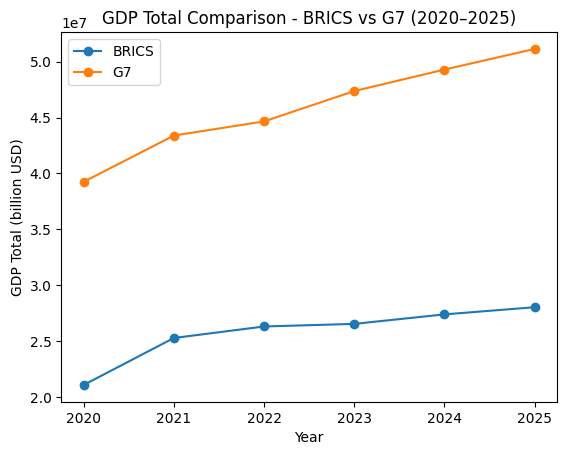

In [43]:

import matplotlib.pyplot as plt

for g in blocks["Group"].unique():
    df_g = blocks[blocks["Group"] == g]
    plt.plot(df_g["Year"], df_g["GDP"], marker="o", label=g)

plt.title("GDP Total Comparison - BRICS vs G7 (2020–2025)")
plt.xlabel("Year")
plt.ylabel("GDP Total (billion USD)")
plt.legend()
plt.show()

In [47]:
# Correlation analysis
df_corr = df_long.pivot(index="Country", columns="Year", values="GDP")
print(df_corr.corr())

Year      2020      2021      2022      2023      2024      2025
Year                                                            
2020  1.000000  0.998938  0.997833  0.997051  0.995771  0.995268
2021  0.998938  1.000000  0.998275  0.996440  0.994999  0.994159
2022  0.997833  0.998275  1.000000  0.999333  0.998698  0.998176
2023  0.997051  0.996440  0.999333  1.000000  0.999830  0.999574
2024  0.995771  0.994999  0.998698  0.999830  1.000000  0.999894
2025  0.995268  0.994159  0.998176  0.999574  0.999894  1.000000


In [48]:
# Correlation analysis of year-over-year GDP growth rates
growth_matrix = df_long.pivot(index="Year", columns="Country", values="GDP_growth_pct")
print(growth_matrix.corr())

Country      Afghanistan   Albania   Algeria   Andorra    Angola  \
Country                                                            
Afghanistan     1.000000  0.006211 -0.123629 -0.329281 -0.405806   
Albania         0.006211  1.000000 -0.009400  0.913815 -0.479163   
Algeria        -0.123629 -0.009400  1.000000  0.103656  0.805809   
Andorra        -0.329281  0.913815  0.103656  1.000000 -0.289409   
Angola         -0.405806 -0.479163  0.805809 -0.289409  1.000000   
...                  ...       ...       ...       ...       ...   
Venezuela      -0.218168  0.014069  0.983714  0.122246  0.839244   
Vietnam        -0.123296 -0.656848  0.756687 -0.522032  0.936838   
Yemen          -0.198143 -0.543811  0.752286 -0.459955  0.959289   
Zambia         -0.527247 -0.537553  0.686528 -0.222419  0.897696   
Zimbabwe       -0.705913  0.450014 -0.223225  0.724118 -0.247164   

Country      Antigua and Barbuda  Argentina   Armenia     Aruba  Australia  \
Country                              